<h1 style="text-align: center;"><strong> Trends in greenhouse gas emissions.</strong></h1>
<h4 style="text-align: center;"> <u>This data analysis constitutes a section of a Data Science Bookcamp that is currently in progress.</u> </h4>



### General ideas:
* The greenhouse effect takes place in the Earth's atmosphere under the influence of the sun's radiation.
* The mechanism is that the sun emits energy that is absorbed by the land, water and vegetation and is then radiated back into space as heat.
* Greenhouse gases such as carbon dioxide (CO<sub>2</sub>), methane (CH<sub>4</sub>) and nitrous oxide (N<sub>2</sub>O), among others, do not allow this heat to be radiated back into space, thus increasing the temperature of the air and the surface of the Earth.

### Hypotheses:
1. Check if there is an increase in greenhouse gases over time for each continent
2. Find a relationship between greenhouse gas emissions and population growth per continent
3. Examine the increase in temperature according to greenhouse gas emissions

### Greenhouse gas emissions in Spain:
 What are the general trends of greenhouse gas emissions in Spain?


### Data:
Global data from CO<sub>2</sub> and greenhouse gas emissions was download from [Github repository](https://github.com/owid/co2-data)
* This dataset includes CO<sub>2</sub> emissions (annual, per capita, cumulative and consumption-based).
* Data cover the period from 1975 to 2023.
* Column information can be found in the [codebook](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv)

# Access to the dataframe

In [1]:
# Loading the main packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# This is the path where the files are located.
path = "C:/Users/Isa/Desktop/DSPT2025/2-Data Analysis/Proyecto"

In [3]:
#Main dataframe with CO2 and other gas emissions
df_global_emission = pd.read_csv(path + '/owid-co2-data.csv', sep=',')

In [5]:
df_global_emission

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50186,Zimbabwe,2019,ZWE,15271377.0,2.514642e+10,0.473,0.031,10.263,-0.942,-8.411,...,NaN,0.106,0.001,0.001,0.002,0.0,34.348,17.531,-0.027,-0.261
50187,Zimbabwe,2020,ZWE,15526888.0,2.317871e+10,0.496,0.032,8.495,-1.768,-17.231,...,NaN,0.105,0.001,0.001,0.002,0.0,31.323,15.775,0.612,7.209
50188,Zimbabwe,2021,ZWE,15797220.0,2.514009e+10,0.531,0.034,10.204,1.709,20.120,...,NaN,0.104,0.001,0.001,0.002,0.0,33.549,17.599,0.539,5.280
50189,Zimbabwe,2022,ZWE,16069061.0,2.590159e+10,0.531,0.033,10.425,0.221,2.169,...,NaN,0.103,0.001,0.001,0.002,0.0,33.772,17.910,0.315,3.018


In [4]:
# Extracting dataset information
df_global_emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50191 entries, 0 to 50190
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50191 non-null  object 
 1   year                                       50191 non-null  int64  
 2   iso_code                                   42262 non-null  object 
 3   population                                 41019 non-null  float64
 4   gdp                                        15251 non-null  float64
 5   cement_co2                                 28863 non-null  float64
 6   cement_co2_per_capita                      25358 non-null  float64
 7   co2                                        29137 non-null  float64
 8   co2_growth_abs                             26981 non-null  float64
 9   co2_growth_prct                            26002 non-null  float64
 10  co2_including_luc     

In [7]:
# get the list of countries
df_global_emission['country'].count()
df_global_emission['country'].unique()



array(['Afghanistan', 'Africa', 'Africa (GCP)', 'Albania', 'Algeria',
       'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Asia (GCP)', 'Asia (excl. China and India)', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Central America (GCP)', 'Chad',
       'Chile', 'China', 'Christmas Island', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Domini

<u>First problem identified</u>:
* The country column contains a mix of countries and continents.
* At this time, data continents are selected.

In [4]:
data_emissions_continent = df_global_emission[df_global_emission['country'].isin(['Africa','Antarctica','Asia',
                                                       'Europe', 'North America', 'South America',
                                                       'Oceania'])]
data_emissions_continent

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
274,Africa,1750,NaN,80349715.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,Africa,1751,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,Africa,1752,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277,Africa,1753,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278,Africa,1754,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42503,South America,2019,NaN,423548289.0,NaN,41.060,0.097,1084.626,6.916,0.642,...,2.094,9.181,0.045,0.093,0.144,0.006,3812.943,1527.522,-74.449,-6.864
42504,South America,2020,NaN,426213551.0,NaN,41.313,0.097,979.441,-105.185,-9.698,...,2.166,9.153,0.045,0.094,0.146,0.007,3752.928,1411.788,-12.195,-1.245
42505,South America,2021,NaN,428331420.0,NaN,46.898,0.110,1079.731,100.290,10.240,...,2.120,9.125,0.046,0.096,0.148,0.007,3982.018,1516.688,-30.086,-2.786
42506,South America,2022,NaN,430492814.0,NaN,47.104,0.109,1096.153,16.422,1.521,...,2.121,9.089,0.046,0.097,0.149,0.007,3892.277,1537.734,-27.286,-2.489


As the dataset is large, a few columns are selected to simplify the analysis:
* Country
* Year
* Population
* co2_including_luc:
Annual CO<sub>2</sub> emissions including land-use change - Annual total emissions of carbon dioxide (CO₂), including land-use change, measured in million tonnes.
* co2_including_luc_per_capita:  Annual emissions of carbon dioxide (CO<sub>2</sub>), including land-use change, measured in tonnes per person.
* consumption_co2: Annual consumption-based CO<sub>2</sub> emissions - Annual consumption-based emissions of carbon dioxide (CO₂), measured in million tonnes.
* consumption_co2_per_capita: Per capita consumption-based CO<sub>2</sub> emissions - Annual consumption-based emissions of carbon dioxide (CO<sub>2</sub>), measured in tonnes per person.
* methane: Annual methane emissions including land use - Measured in tonnes of carbon dioxide-equivalents over a 100-year timescale.
* methane_per_capita: Per capita methane emissions including land use - Measured in tonnes per person of carbon dioxide-equivalents over a 100-year timescale.
* nitrous_oxide: Annual nitrous oxide emissions including land use - Measured in tonnes of carbon dioxide-equivalents over a 100-year timescale.
* nitrous_oxide_per_capita: Per capita nitrous oxide emissions including land use - Measured in tonnes per person of carbon dioxide-equivalents over a 100-year timescale.
* temperature_change_from_ch4: Change in global mean surface temperature caused by methane (CH<sub>4</sub>)emissions - Measured in ºC
* temperature_change_from_co2: Change in global mean surface temperature caused by CO<sub>2</sub> emissions - Measured in ºC.
* temperature_change_from_n2o: Change in global mean surface temperature caused by nitrous oxide emissions - Measured in ºC.



In [5]:
#Filtering by columns names:
data_emissions_continent = data_emissions_continent.loc[:, data_emissions_continent.columns.isin(['country', 'year', 'population', 'co2_including_luc',
                                                           'co2_including_luc_per_capita','consumption_co2','consumption_co2_per_capita', 'methane','methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita',
                                                           'temperature_change_from_ch4', 'temperature_change_from_co2', 'temperature_change_from_n2o' ])]

In [9]:
data_emissions_continent #View dataframe

,country,year,population,co2_including_luc,co2_including_luc_per_capita,consumption_co2,consumption_co2_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_n2o
274,Africa,1750,80349715.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,Africa,1751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,Africa,1752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277,Africa,1753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278,Africa,1754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42503,South America,2019,423548289.0,2546.332,6.016,1010.176,2.387,1044.163,2.465,304.532,0.719,0.045,0.093,0.006
42504,South America,2020,426213551.0,2478.592,5.819,967.246,2.271,1044.662,2.451,315.724,0.741,0.045,0.094,0.007
42505,South America,2021,428331420.0,2816.267,6.580,1049.645,2.452,1055.168,2.463,322.148,0.752,0.046,0.096,0.007
42506,South America,2022,430492814.0,2660.583,6.185,1068.867,2.485,1059.345,2.461,326.465,0.758,0.046,0.097,0.007


In [11]:
#Verify the inicial and final years of the data collection
print(f'The first year with data registration of gas emissions is {data_emissions_continent['year'].min()}')
print(f'The last year with data of gas emissions is {data_emissions_continent['year'].max()}')

The first year with data registration of gas emissions is 1750
The last year with data of gas emissions is 2023


In [6]:
#Rename the colum name as 'country'
data_emissions_continent.rename(columns={'country': 'continent'}, inplace= True)

C:\Users\Isa\AppData\Local\Temp\ipykernel_12700\3091339240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_emissions_continent.rename(columns={'country': 'continent'}, inplace= True)


In [12]:
#Identify NaNs:
data_emissions_continent.isnull()

,continent,year,population,co2_including_luc,co2_including_luc_per_capita,consumption_co2,consumption_co2_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_n2o
274,False,False,False,True,True,True,True,True,True,True,True,True,True,True
275,False,False,True,True,True,True,True,True,True,True,True,True,True,True
276,False,False,True,True,True,True,True,True,True,True,True,True,True,True
277,False,False,True,True,True,True,True,True,True,True,True,True,True,True
278,False,False,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
42504,False,False,False,False,False,False,False,False,False,False,False,False,False,False
42505,False,False,False,False,False,False,False,False,False,False,False,False,False,False
42506,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
#Remove NaNs by rows
data_emissions_continent= data_emissions_continent.dropna(axis='rows')

In [8]:
# Since NaNs values have been remove, we identified again the minimal and maximal years with non missing values
data_emissions_continent['year'].min()
data_emissions_continent['year'].max()
print(f'After removing NAs values, the first and last year with data registration are {data_emissions_continent['year'].min()} and {data_emissions_continent['year'].max()}')

After removing NAs values, the first and last year with data registration are 1990 and 2022


Initially, the first year found was 1750. After removing missing values, the first year with data registration on gas emissions is 1990. 

Some many years have been deleted it...




In [9]:
#Print the years with data on gas emission registrations
data_emissions_continent['year'].unique()
#Count
data_emissions_continent["year"].count()

display(data_emissions_continent['year'].unique(),data_emissions_continent["year"].count() )


array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

np.int64(198)

In [12]:
#Print data of continents
data_emissions_continent['continent'].unique()

array(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'], dtype=object)

Then, in order to normalise the data, each individual gas emission was divided by the area of the country:
|Contienents| Area (km <sup>2</sup>)|
|-------|-------------------------------|
|Africa| 30.221.535|
|Asia| 44.541.138 |
|Europe| 10.530.751 |
|North America| 24.710.000|
|Oceania| 8.542.499 |
|South America| 442.000.000|

The information of the total area have been taken from [Wikipedia](https://es.wikipedia.org/wiki/Wikipedia:Portada)

In [8]:
#Check iterrows method:
for index, row in data_emissions_continent.iterrows():
  print(row["co2_including_luc"])

1561.848
1658.243
1838.861
1947.653
2227.859
2240.975
2162.979
2197.585
2325.196
2182.751
2233.234
2151.343
2369.119
2522.337
2486.618
2463.87
2468.392
2523.45
2998.069
3184.491
3398.941
3496.274
3424.968
3301.052
3188.3
2996.065
3047.598
3269.644
2865.312
2826.805
2568.785
2691.579
2719.051
8514.754
9044.95
9163.75
9237.331
9955.994
10075.249
10621.063
12379.587
10688.523
11139.543
11183.743
11019.978
11612.686
12437.464
13177.229
13862.595
15246.732
15462.133
16260.511
17140.412
17826.924
19187.695
19904.789
20129.354
20697.158
21006.764
20140.516
20459.465
21042.113
21687.756
20980.775
21863.449
22044.652
8231.39
7983.153
7169.284
6765.468
6437.724
6313.62
6841.8
6217.627
6136.604
6097.435
5963.216
5980.625
5935.872
6162.762
6249.64
6197.516
6319.22
6378.48
6259.054
5915.457
6319.022
5974.34
6236.625
5916.277
5556.65
5878.12
5868.395
5887.824
5914.482
5528.837
5190.953
5495.522
5489.547
6943.723
6720.736
6810.747
6839.062
7101.747
6960.235
7215.78
7330.072
7479.878
7603.286
7808.127

In [10]:
#Adding a new column with individual gas emissions divided by area
area = {'Africa': 30221535, #area of continents in the dataframe
        'Asia': 44541138,
        'Europe': 10530751,
        'North America': 24710000,
        'Oceania': 8542499,
        'South America': 442000000}

# Initialize new columns with zeros
data_emissions_continent['co2_including_luc_A'] = 0
data_emissions_continent['methane_A'] = 0
data_emissions_continent['nitrous_oxide_A'] = 0


for idx, row in data_emissions_continent.iterrows():
    continents = row['continent'] # Access the continent value for the current row
    data_emissions_continent.loc[idx,'co2_including_luc_A'] = row['co2_including_luc'] // area[continents]
    data_emissions_continent.loc[idx,'methane_A'] = row['methane'] // area[continents]
    data_emissions_continent.loc[idx,'nitrous_oxide_A'] = row['nitrous_oxide'] // area[continents]
data_emissions_continent.columns # to see the  columns of the dataframe after normalize the data
data_emissions_continent # print the dataframe

,continent,year,population,co2_including_luc,co2_including_luc_per_capita,consumption_co2,consumption_co2_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_n2o,co2_including_luc_A,methane_A,nitrous_oxide_A
514,Africa,1990,643775320.0,1561.848,2.430,582.548,0.906,963.650,1.497,281.277,0.437,0.032,0.042,0.005,0,0,0
515,Africa,1991,661103806.0,1658.243,2.512,606.850,0.919,983.942,1.488,283.538,0.429,0.033,0.043,0.005,0,0,0
516,Africa,1992,678558076.0,1838.861,2.714,619.978,0.915,1000.285,1.474,290.115,0.428,0.033,0.044,0.006,0,0,0
517,Africa,1993,696621727.0,1947.653,2.800,643.034,0.924,1015.053,1.457,292.830,0.420,0.034,0.044,0.006,0,0,0
518,Africa,1994,714502658.0,2227.859,3.122,715.960,1.003,1078.401,1.509,295.462,0.414,0.035,0.045,0.006,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42502,South America,2018,420440406.0,2496.738,5.942,1001.920,2.385,1036.531,2.465,292.207,0.695,0.044,0.092,0.006,0,0,0
42503,South America,2019,423548289.0,2546.332,6.016,1010.176,2.387,1044.163,2.465,304.532,0.719,0.045,0.093,0.006,0,0,0
42504,South America,2020,426213551.0,2478.592,5.819,967.246,2.271,1044.662,2.451,315.724,0.741,0.045,0.094,0.007,0,0,0
42505,South America,2021,428331420.0,2816.267,6.580,1049.645,2.452,1055.168,2.463,322.148,0.752,0.046,0.096,0.007,0,0,0


In [15]:
#Check the results are correct by comparing columns:
data_emissions_continent[data_emissions_continent['continent']=='Europe']
data_emissions_continent['co2_including_luc'] / area['Europe']
display(data_emissions_continent['co2_including_luc'] / area['Africa'], data_emissions_continent['co2_including_luc_A'])

514      0.000052
515      0.000055
516      0.000061
517      0.000064
518      0.000074
           ...   
42502    0.000083
42503    0.000084
42504    0.000082
42505    0.000093
42506    0.000088
Name: co2_including_luc, Length: 198, dtype: float64

514      0.000052
515      0.000055
516      0.000061
517      0.000064
518      0.000074
           ...   
42502    0.000006
42503    0.000006
42504    0.000006
42505    0.000006
42506    0.000006
Name: co2_including_luc_A, Length: 198, dtype: float64

<u>Second problem identified</u>:


- Initially, during the execution of the *FOR loop*, I divided the gas emissions columns by area, but I could not access the data by continent.
- To solve this, I looked for a method that allowed me to access the rows: **.iterrows()**
- **iterrows()**: The iterrows() method generates an iterator object of the DataFrame, allowing us to iterate each row in the DataFrame. Each iteration produces an index object and a row object (a Pandas Series object)
- Then, by using **.loc**  I accessed to the index and row in the dataframe and divided by the area of each country.



# Analysis of data:

In [20]:
#Find the minimal CO2, CH4 and N20 emissions normalized by area
min_CO2_A= pd.DataFrame(data_emissions_continent.loc[data_emissions_continent["co2_including_luc_A"].idxmin(),["continent", 'year']])
min_CH4_A= pd.DataFrame(data_emissions_continent.loc[data_emissions_continent["methane_A"].idxmin(),["continent", 'year']])
min_N2O_A= pd.DataFrame(data_emissions_continent.loc[data_emissions_continent["nitrous_oxide_A"].idxmin(),["continent", 'year']])

In [21]:
#Find the minimal CO2, CH4 and N20 emissions 
min_CO2= pd.DataFrame(data_emissions_continent.loc[data_emissions_continent["co2_including_luc"].idxmin(),["continent", 'year']])
min_CH4= pd.DataFrame(data_emissions_continent.loc[data_emissions_continent["methane"].idxmin(),["continent", 'year']])
min_N2O= pd.DataFrame(data_emissions_continent.loc[data_emissions_continent["nitrous_oxide"].idxmin(),["continent", 'year']])

In [22]:
#Modify dataframe with minimal  gas emission values to get a global view 
display(min_CO2_A, min_CH4_A, min_N2O_A)

#Trasposing and change index names:
min_CO2_A_T = min_CO2_A.T.rename(index={42474:'min_CO2_A'})
min_CH4_A_T = min_CH4_A.T.rename(index={42474:'min_CH4_A'})
min_N2O_A_T = min_N2O_A.T.rename(index={42474:'min_N2O_A'})

#Trasposing and change index names:
display(min_CO2, min_CH4, min_N2O)
min_CO2_T = min_CO2.T.rename(index={35361:'min_CO2'})
min_CH4_T = min_CH4.T.rename(index={35390:'min_CH4'})
min_N2O_T = min_N2O.T.rename(index={35390:'min_N2O'})




,42474
continent,South America
year,1990


,42474
continent,South America
year,1990


,42474
continent,South America
year,1990


,35361
continent,Oceania
year,1991


,35390
continent,Oceania
year,2020


,35390
continent,Oceania
year,2020


In [23]:
#Find the maximal CO2, CH4 and N20 emissions by area
max_CO2_A= pd.DataFrame(data_emissions_continent.loc[data_emissions_continent["co2_including_luc_A"].idxmax(),["continent", 'year']])
max_CH4_A= pd.DataFrame(data_emissions_continent.loc[data_emissions_continent["methane_A"].idxmax(),["continent", 'year']])
max_N2O_A= pd.DataFrame(data_emissions_continent.loc[data_emissions_continent["nitrous_oxide_A"].idxmax(),["continent", 'year']])

In [24]:
#Find the maximal CO2, CH4 and N20 emissions 
max_CO2= pd.DataFrame(data_emissions_continent.loc[data_emissions_continent["co2_including_luc"].idxmax(),["continent", 'year']])
max_CH4= pd.DataFrame(data_emissions_continent.loc[data_emissions_continent["methane"].idxmax(),["continent", 'year']])
max_N2O= pd.DataFrame(data_emissions_continent.loc[data_emissions_continent["nitrous_oxide"].idxmax(),["continent", 'year']])

In [25]:
#Modify dataframe with  maximal gas emission values to get a global view 
display(max_CO2_A, max_CH4_A, max_N2O_A)

#Trasposing and change index names:
max_CO2_A_T = max_CO2_A.T.rename(index={15159:'max_CO2_A'})
max_CH4_A_T = max_CH4_A.T.rename(index={15159:'max_CH4_A'})
max_N2O_A_T = max_N2O_A.T.rename(index={15159:'max_N2O_A'})

#Emissions per country
display(max_CO2, max_CH4, max_N2O)

#Trasposing and change index names:
max_CO2_T = max_CO2.T.rename(index={2938:'max_CO2'})
max_CH4_T = max_CH4.T.rename(index={2938:'max_CH4'})
max_N2O_T = max_N2O.T.rename(index={2938:'max_N2O'})




,15159
continent,Europe
year,1990


,15159
continent,Europe
year,1990


,15159
continent,Europe
year,1990


,2938
continent,Asia
year,2022


,2938
continent,Asia
year,2022


,2938
continent,Asia
year,2022


In [26]:
# To compare the results
pd.concat([min_CO2_T,min_CO2_A_T, max_CO2_T, max_CO2_A_T,
           min_CH4_T, min_CH4_A_T, max_CH4_T, max_CH4_A_T,
           min_N2O_T,min_N2O_A_T,  max_N2O_T, max_N2O_A_T], join='outer', axis=0)

,continent,year
min_CO2,Oceania,1991
min_CO2_A,South America,1990
max_CO2,Asia,2022
max_CO2_A,Europe,1990
min_CH4,Oceania,2020
min_CH4_A,South America,1990
max_CH4,Asia,2022
max_CH4_A,Europe,1990
min_N2O,Oceania,2020
min_N2O_A,South America,1990


In view of the earlier findings concerning the minimal and maximal gas emissions, it is crucial to determine the data distribution of gas emissions

In [27]:
#Loading the plot style
plt.style.use('seaborn-v0_8-pastel')

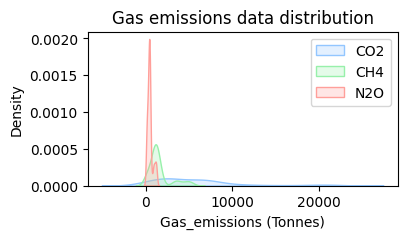

In [28]:
#Density Diagram of gass emissions without considering the area of the country (raw data)
plt.figure(figsize=(4,2))
sns.kdeplot(data=data_emissions_continent['co2_including_luc'], fill=True, label= 'CO2')
sns.kdeplot(data=data_emissions_continent['methane'], fill=True, label= 'CH4')
sns.kdeplot(data=data_emissions_continent['nitrous_oxide'], fill=True, label= 'N2O')
plt.xlabel('Gas_emissions (Tonnes)')
plt.ylabel('Density')
plt.title('Gas emissions data distribution')
plt.legend(loc='upper right');

In [29]:
CO2_kurtosis= data_emissions_continent['co2_including_luc'].kurtosis()
CH4_kurtosis= data_emissions_continent['methane'].kurtosis()
N2O_kurtosis= data_emissions_continent['nitrous_oxide'].kurtosis()
display(CO2_kurtosis, CH4_kurtosis, N2O_kurtosis)



np.float64(2.1918739165932775)

np.float64(1.7649675354144132)

np.float64(0.8675350982046117)

The data of gas emissions distribution are:


|Gas emissions|Kurtosis coefficient|Shape|
|-------------|------------------------|----------------|
|CO<sub>2</sub>| 2.19|Leptokurtic|
|CH<sub>4</sub>| 1.76|Leptokurtic|
|N<sub>2</sub>|0.87|Platikurtic|



Then, it is crucial to determine the correlation between gas emissions and population growth.
+ In the following plots, the gas emissions data normalized by area have been taken into account

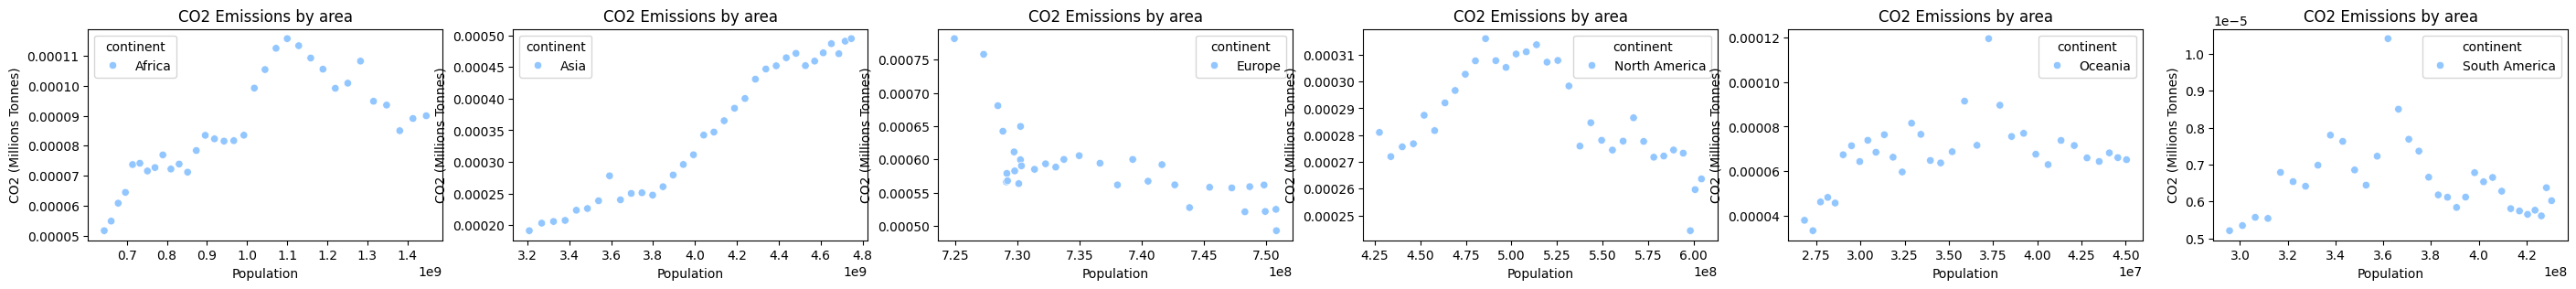

In [30]:
#Defining a correlation plot for CO2 emissions BY AREA
fig, ax = plt.subplots(1, len(data_emissions_continent["continent"].unique()), figsize=(35, 3))
for ax, cont in zip(ax, data_emissions_continent["continent"].unique()):
    subcont = data_emissions_continent[data_emissions_continent["continent"] == cont]
    plot = sns.scatterplot(data=subcont, x='population', y='co2_including_luc_A', ax = ax, hue='continent')
    plot.set_ylabel('CO2 (Millions Tonnes)')
    plot.set_xlabel('Population')
    plot.set_title('CO2 Emissions by area')
plt.show()



* Result: CO<sub>2</sub> emissions appear to be positively correlated with population growth in Asia and negatively correlated in Europe.

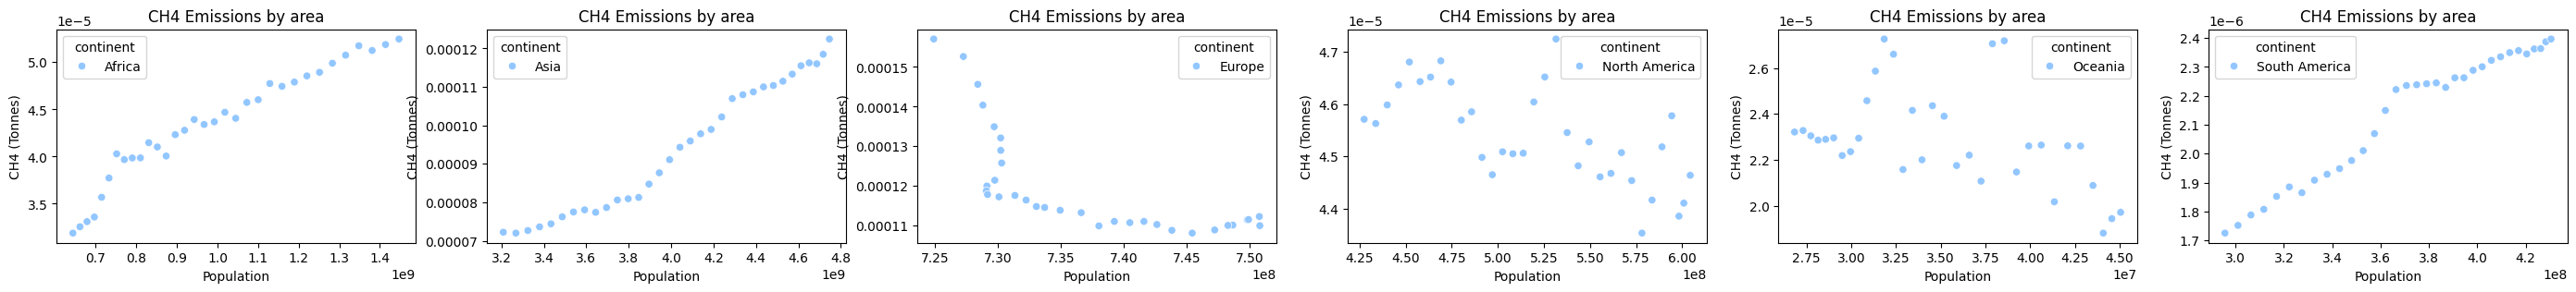

In [31]:
#Defining a correlation plot for CH4 emissions BY AREA
fig, ax = plt.subplots(1, len(data_emissions_continent["continent"].unique()), figsize=(35, 3))
for ax, cont in zip(ax, data_emissions_continent["continent"].unique()):
    subcont = data_emissions_continent[data_emissions_continent["continent"] == cont]
    plot = sns.scatterplot(data=subcont, x='population', y='methane_A', ax = ax, hue='continent')
    plot.set_ylabel('CH4 (Tonnes)')
    plot.set_xlabel('Population')
    plot.set_title('CH4 Emissions by area')
plt.show()

* CH<sub>4</sub> emissions are positive correlated with population growth in Africa, Asia and South America. However, in Europe, CH<sub>4</sub> emissions are negative correlated with population growth

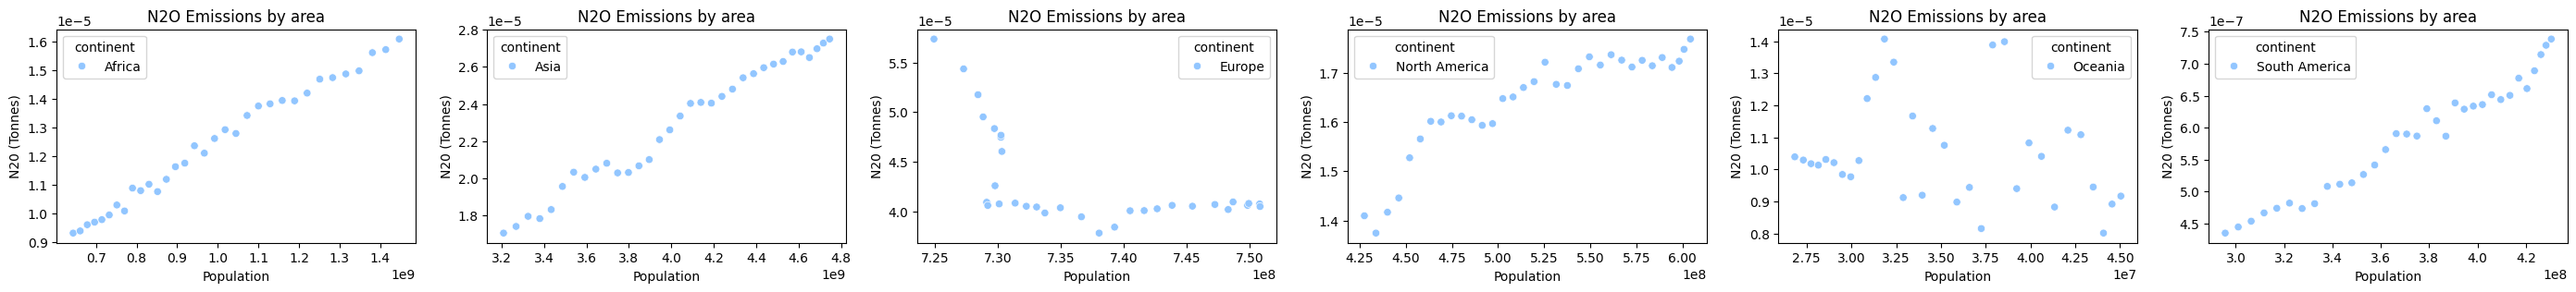

In [32]:
#Defining a correlation plot for N20 emissions BY AREA
fig, ax = plt.subplots(1, len(data_emissions_continent["continent"].unique()), figsize=(35, 3))
for ax, cont in zip(ax, data_emissions_continent["continent"].unique()):
    subcont = data_emissions_continent[data_emissions_continent["continent"] == cont]
    plot = sns.scatterplot(data=subcont, x='population', y='nitrous_oxide_A', ax = ax, hue='continent')
    plot.set_ylabel('N20 (Tonnes)')
    plot.set_xlabel('Population')
    plot.set_title('N2O Emissions by area')
plt.show()

* Europe is the only continent that appears to show a negative correlation between N<sub>2</sub>0 emissions and population growth. In Oceania no correlation was found and for the rest of the continents, N20 emissions are positively correlated with population growth.

<u>General results of correlation between gas emissions and population growth</u>:
+ Asia: Here, there is a positive correlation between the three type of gas emissions and population growth
+ Europe: gas emissions and population growth are negatively correlated
+ CH<sub>4</sub> and N<sub>2</sub>O emissions are positive correlated with population growth in Africa and South America

As there is a positive correlation between gas emissions and population growth in some countries, we now compare gas emissions with gas emissions per capita.

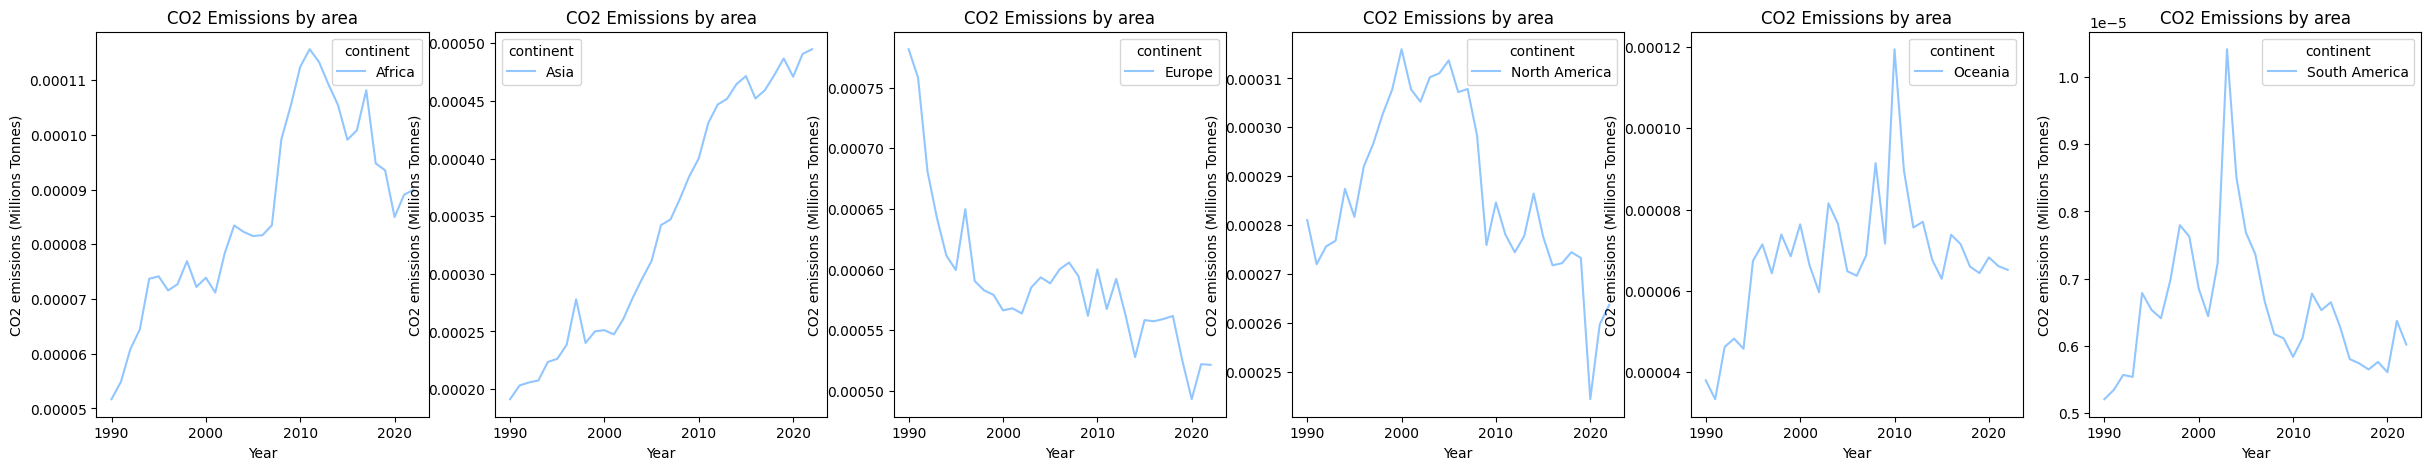

In [33]:
#Defining  CO2 emissions plot over the years BY AREA
fig, ax = plt.subplots(1, len(data_emissions_continent["continent"].unique()), figsize=(30, 5))
for ax, cont in zip(ax, data_emissions_continent["continent"].unique()):
    subcont = data_emissions_continent[data_emissions_continent["continent"] == cont]
    plot1 = sns.lineplot(data=subcont, x='year', y='co2_including_luc_A', ax = ax, hue='continent')
    plot1.set_ylabel('CO2 emissions (Millions Tonnes)')
    plot1.set_xlabel('Year')
    plot1.set_title('CO2 Emissions by area')
plt.show()

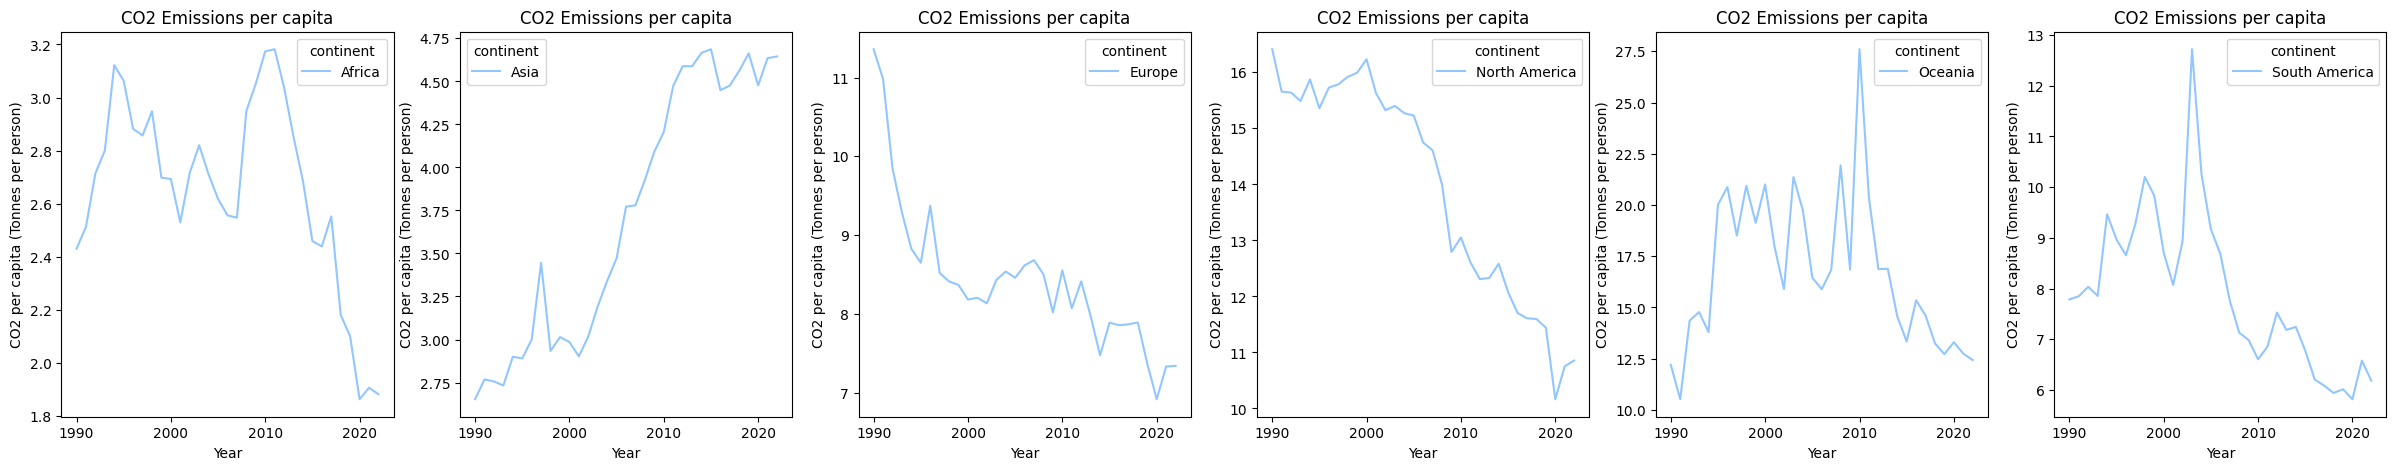

In [34]:
#Defining  CO2 gas emissions per capita over years
fig, ax = plt.subplots(1, len(data_emissions_continent["continent"].unique()), figsize=(30, 5))
for ax, cont in zip(ax, data_emissions_continent["continent"].unique()):
    subcont = data_emissions_continent[data_emissions_continent["continent"] == cont]
    plot2 = sns.lineplot(data=subcont, x='year', y='co2_including_luc_per_capita', ax = ax, hue='continent')
    plot2.set_ylabel('CO2 per capita (Tonnes per person)')
    plot2.set_xlabel('Year')
    plot2.set_title('CO2 Emissions per capita')
plt.show()

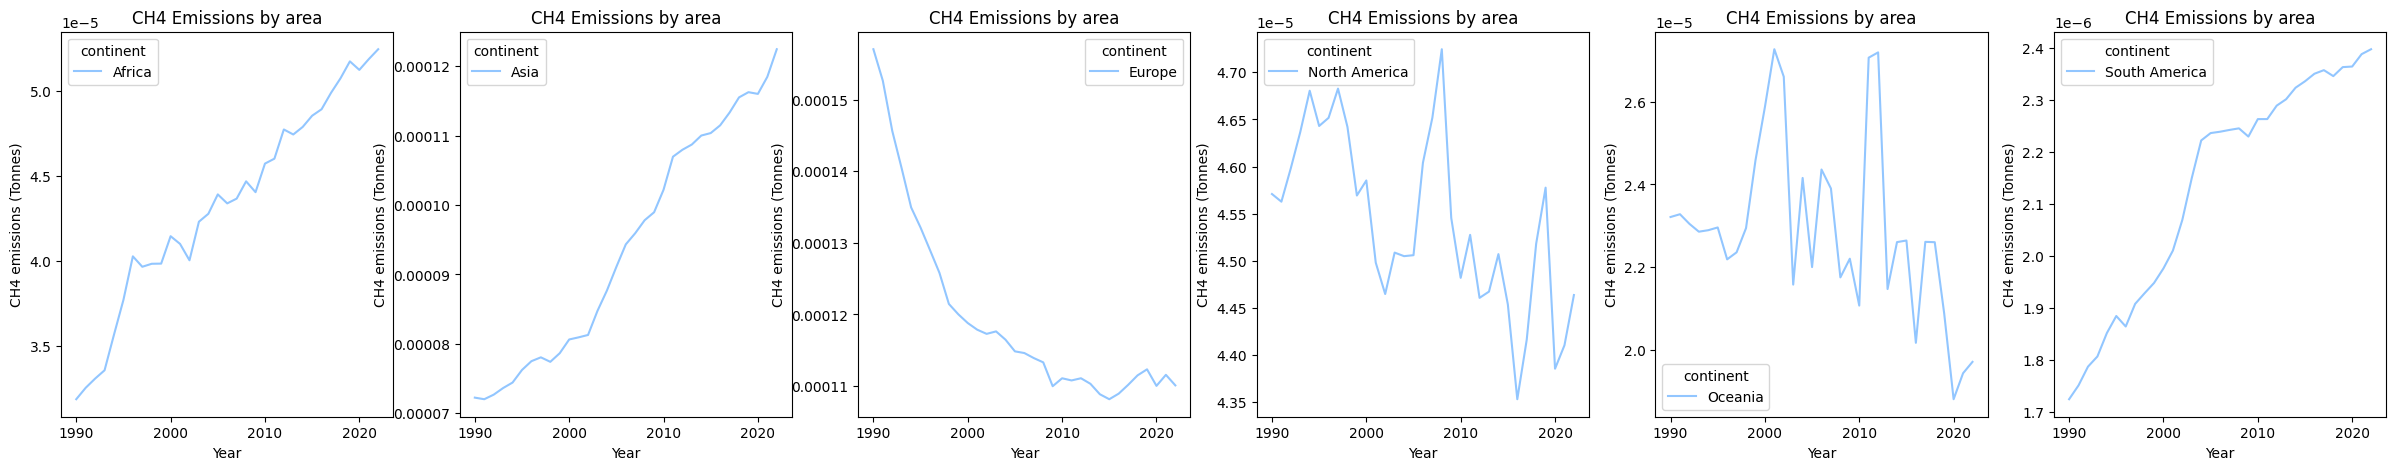

In [35]:
# CH4 gas emissions over years BY AREA
fig, ax = plt.subplots(1, len(data_emissions_continent["continent"].unique()), figsize=(30, 5))
for ax, cont in zip(ax, data_emissions_continent["continent"].unique()):
    subcont = data_emissions_continent[data_emissions_continent["continent"] == cont]
    plot1 = sns.lineplot(data=subcont, x='year', y='methane_A', ax = ax, hue='continent')
    plot1.set_ylabel('CH4 emissions (Tonnes)')
    plot1.set_xlabel('Year')
    plot1.set_title('CH4 Emissions by area')
plt.show()

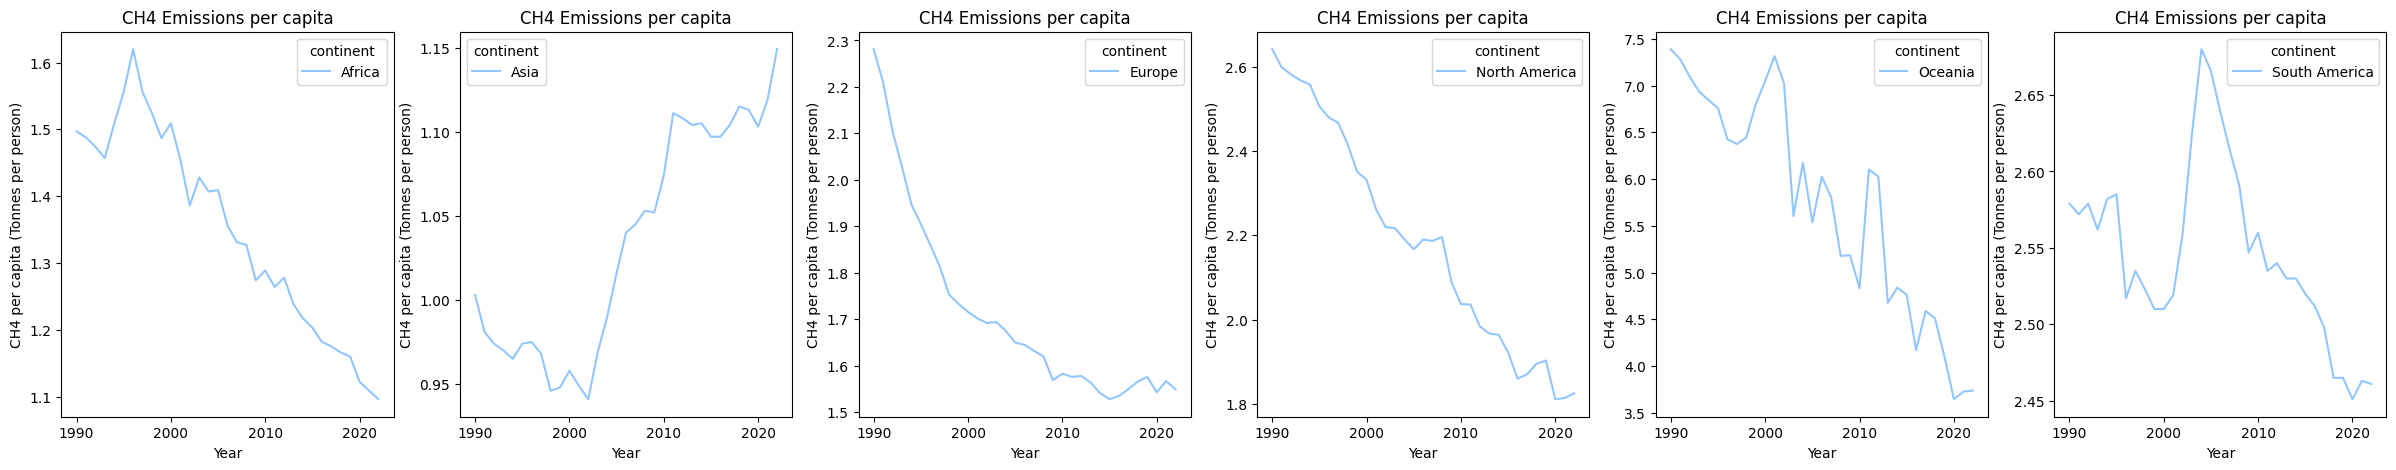

In [36]:
#CH4 emissions per capita over years
fig, ax = plt.subplots(1, len(data_emissions_continent["continent"].unique()), figsize=(30, 5))
for ax, cont in zip(ax, data_emissions_continent["continent"].unique()):
    subcont = data_emissions_continent[data_emissions_continent["continent"] == cont]
    plot2 = sns.lineplot(data=subcont, x='year', y='methane_per_capita', ax = ax, hue='continent')
    plot2.set_ylabel('CH4 per capita (Tonnes per person)')
    plot2.set_xlabel('Year')
    plot2.set_title('CH4 Emissions per capita')
plt.show()

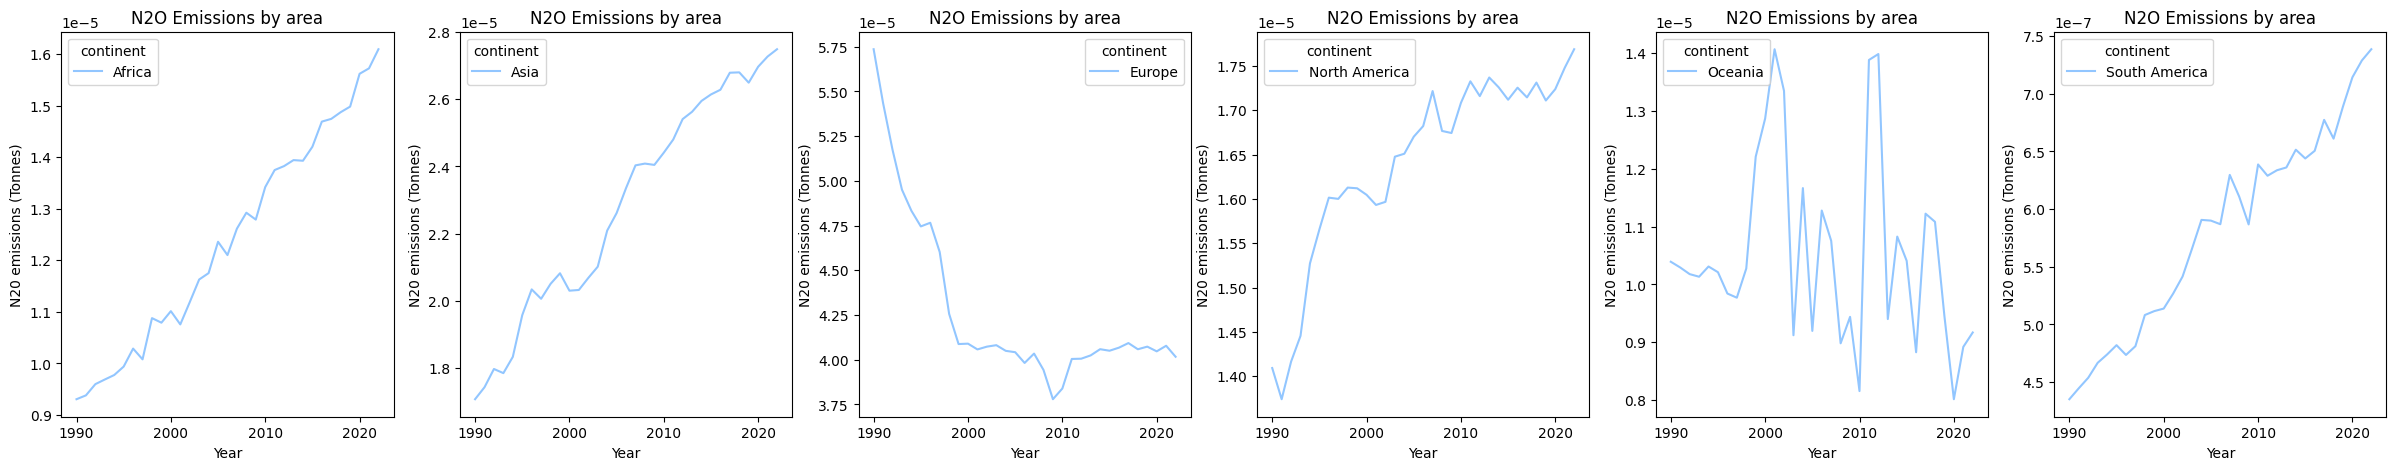

In [37]:
#N20 emissions plot over years by area
fig, ax = plt.subplots(1, len(data_emissions_continent["continent"].unique()), figsize=(30, 5))
for ax, cont in zip(ax, data_emissions_continent["continent"].unique()):
    subcont = data_emissions_continent[data_emissions_continent["continent"] == cont]
    plot1 = sns.lineplot(data=subcont, x='year', y='nitrous_oxide_A', ax = ax, hue='continent')
    plot1.set_ylabel('N20 emissions (Tonnes)')
    plot1.set_xlabel('Year')
    plot1.set_title('N2O Emissions by area')
plt.show()

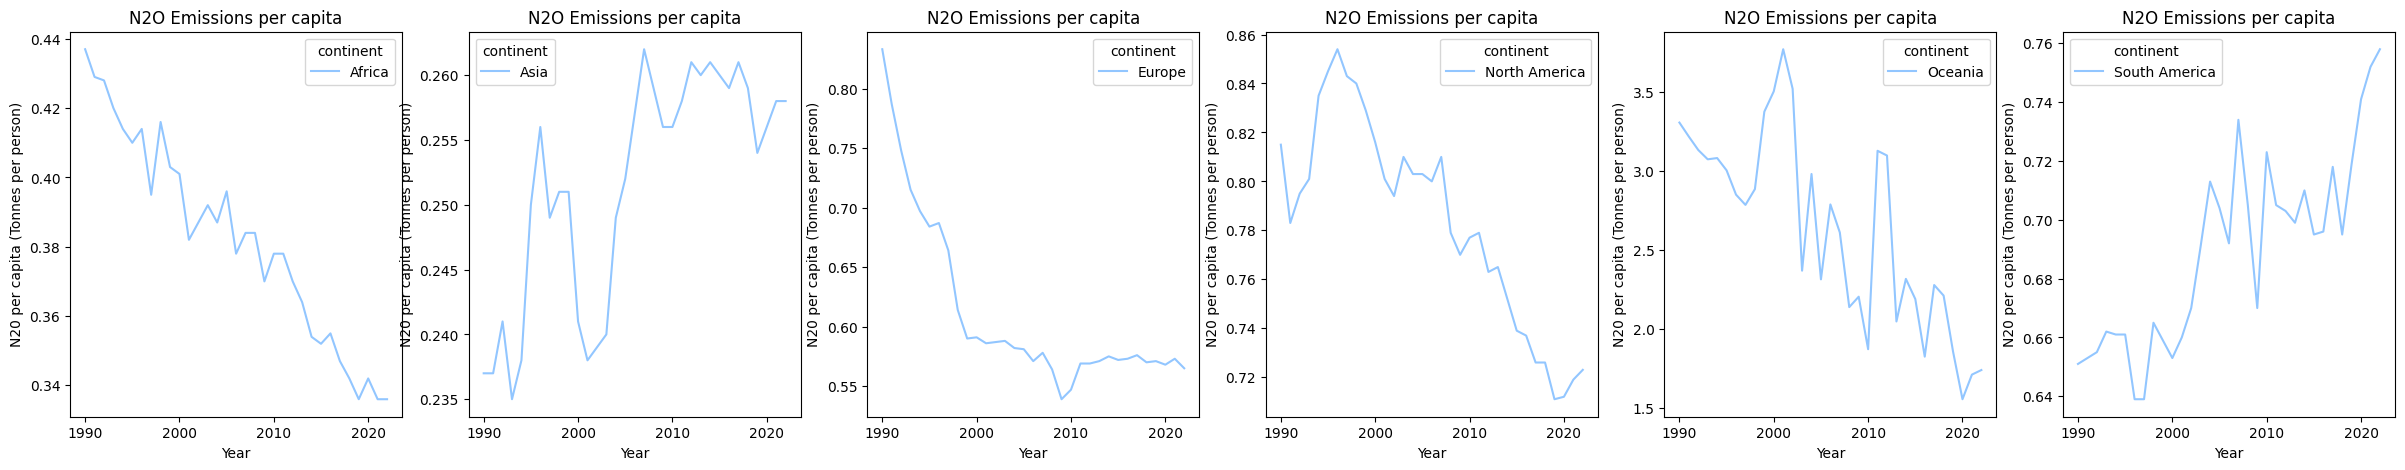

In [38]:
#N20 emissions gas per capita over years
fig, ax = plt.subplots(1, len(data_emissions_continent["continent"].unique()), figsize=(30, 5))
for ax, cont in zip(ax, data_emissions_continent["continent"].unique()):
    subcont = data_emissions_continent[data_emissions_continent["continent"] == cont]
    plot2 = sns.lineplot(data=subcont, x='year', y='nitrous_oxide_per_capita', ax = ax, hue='continent')
    plot2.set_ylabel('N20 per capita (Tonnes per person)')
    plot2.set_xlabel('Year')
    plot2.set_title('N2O Emissions per capita')
plt.show()

<u>General trends of gas emissions and gas emissions per capita</u>:


CO<sub>2</sub> and CH<sub>4</sub> gas emissions and per capita have shown a similar trend in Asia an Europe, while N<sub>2</sub>O displayed the opposite tren in Africa

Then, CO<sub>2</sub> emissions and consumption were plotted:
+ The area of the continent has not been taken into account in these plots.

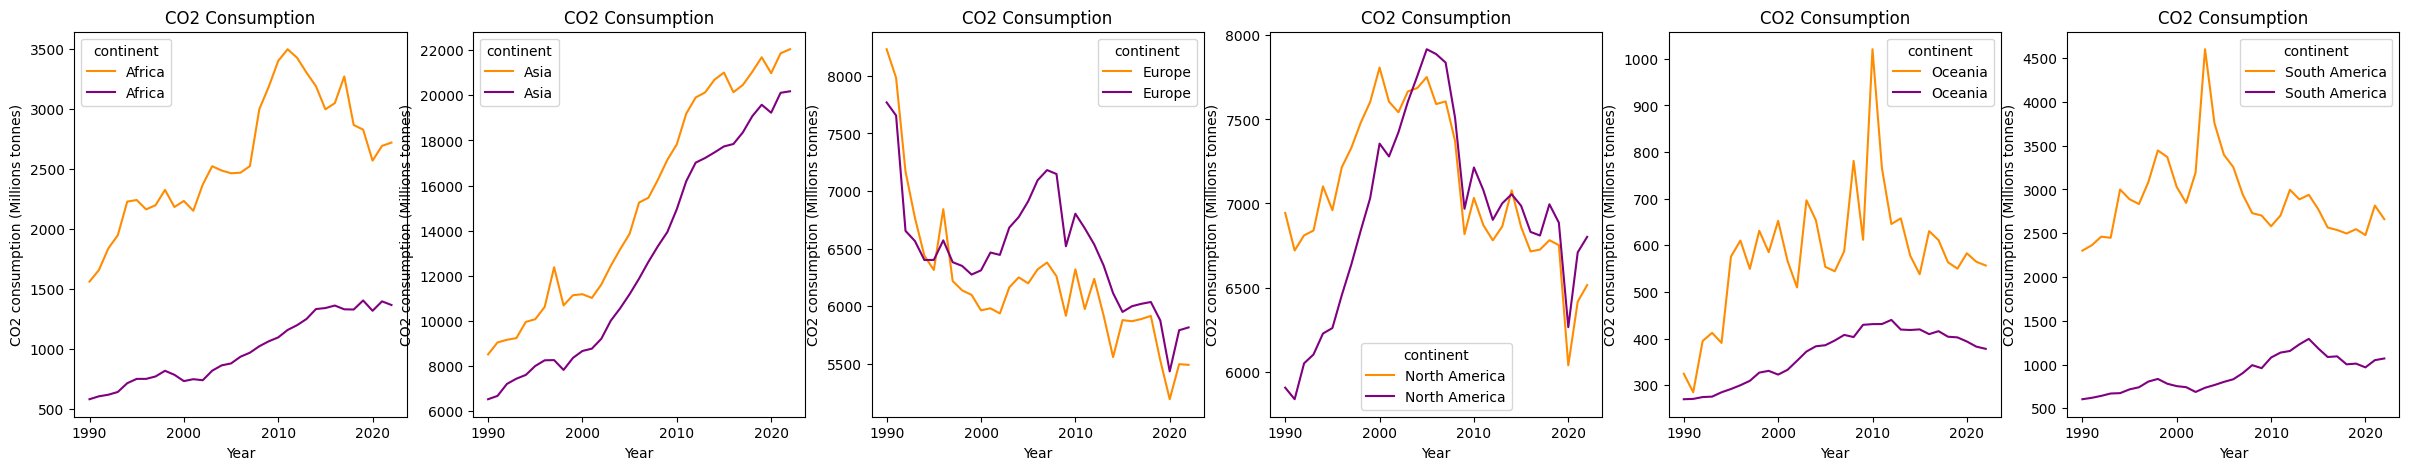

In [17]:
#Plot for CO2 emissions vs comsuptions
fig, ax = plt.subplots(1, len(data_emissions_continent["continent"].unique()), figsize=(30, 5))
for ax, cont in zip(ax, data_emissions_continent["continent"].unique()):
    subcont = data_emissions_continent[data_emissions_continent["continent"] == cont]
    plot1 = sns.lineplot(data=subcont, x='year', y='co2_including_luc', ax = ax, hue='continent',palette=['darkorange'])
    plot2 = sns.lineplot(data=subcont, x='year', y='consumption_co2', ax = ax, hue='continent',palette=['purple'])
    plot1.set_ylabel('CO2 emissions (Millions tonnes)')
    plot1.set_xlabel('Year')
    plot1.set_title('CO2 Emissions')
    plot2.set_ylabel('CO2 consumption (Millions tonnes)')
    plot2.set_xlabel('Year')
    plot2.set_title('CO2 Consumption')
plt.show()

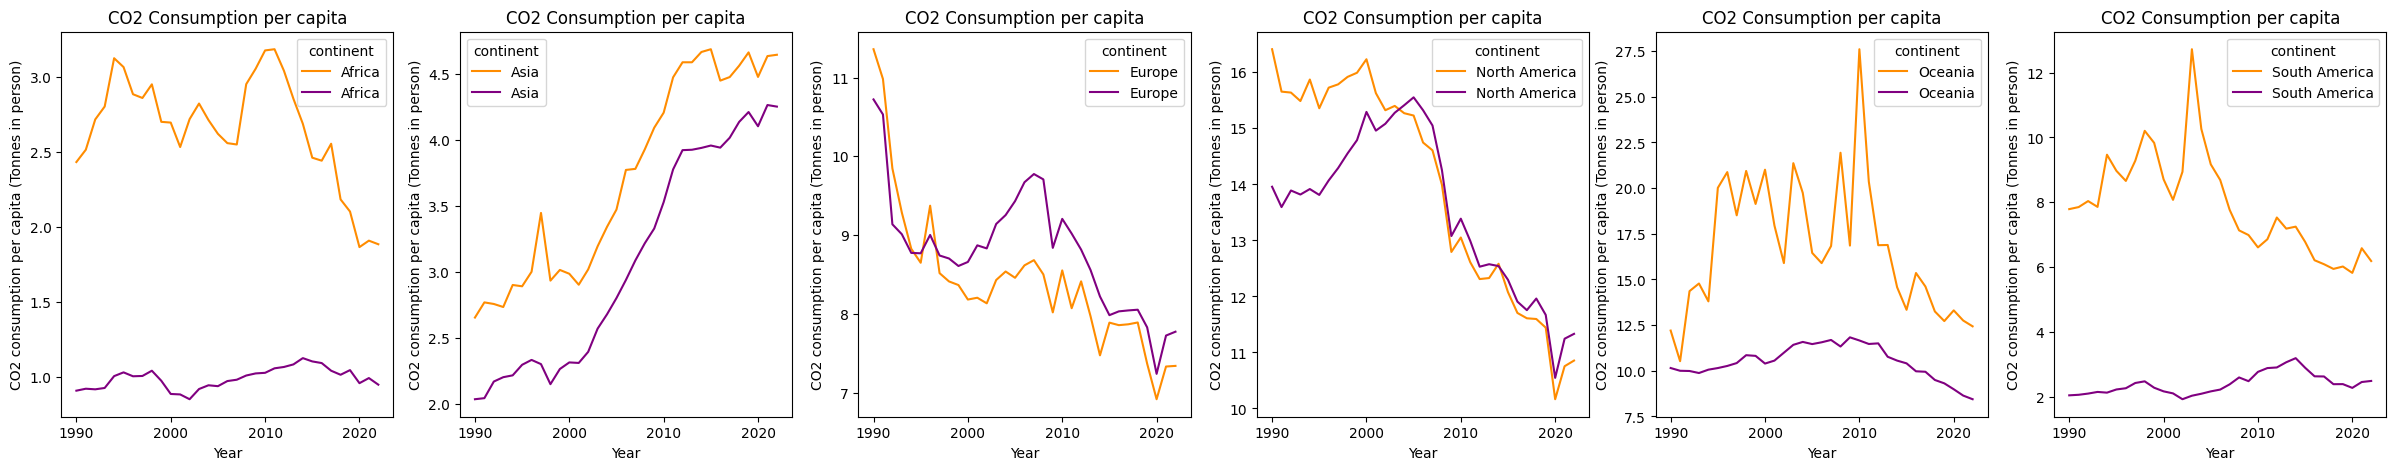

In [51]:
#Plot for CO2 emissions vs comsuptions per capita
fig, ax = plt.subplots(1, len(data_emissions_continent["continent"].unique()), figsize=(30, 5))
for ax, cont in zip(ax, data_emissions_continent["continent"].unique()):
    subcont = data_emissions_continent[data_emissions_continent["continent"] == cont]
    plot1 = sns.lineplot(data=subcont, x='year', y='co2_including_luc_per_capita', ax = ax, hue='continent', palette= ['darkorange'])
    plot2 = sns.lineplot(data=subcont, x='year', y='consumption_co2_per_capita', ax = ax, hue='continent', palette=['purple'])
    plot1.set_ylabel('CO2 emissions per capita (Tonnes in person)')
    plot1.set_xlabel('Year')
    plot1.set_title('CO2 Emissions per capita')
    plot2.set_ylabel('CO2 consumption per capita (Tonnes in person)')
    plot2.set_xlabel('Year')
    plot2.set_title('CO2 Consumption per capita')
plt.show()

Finally, temperature increases were plotted per gas emissions:

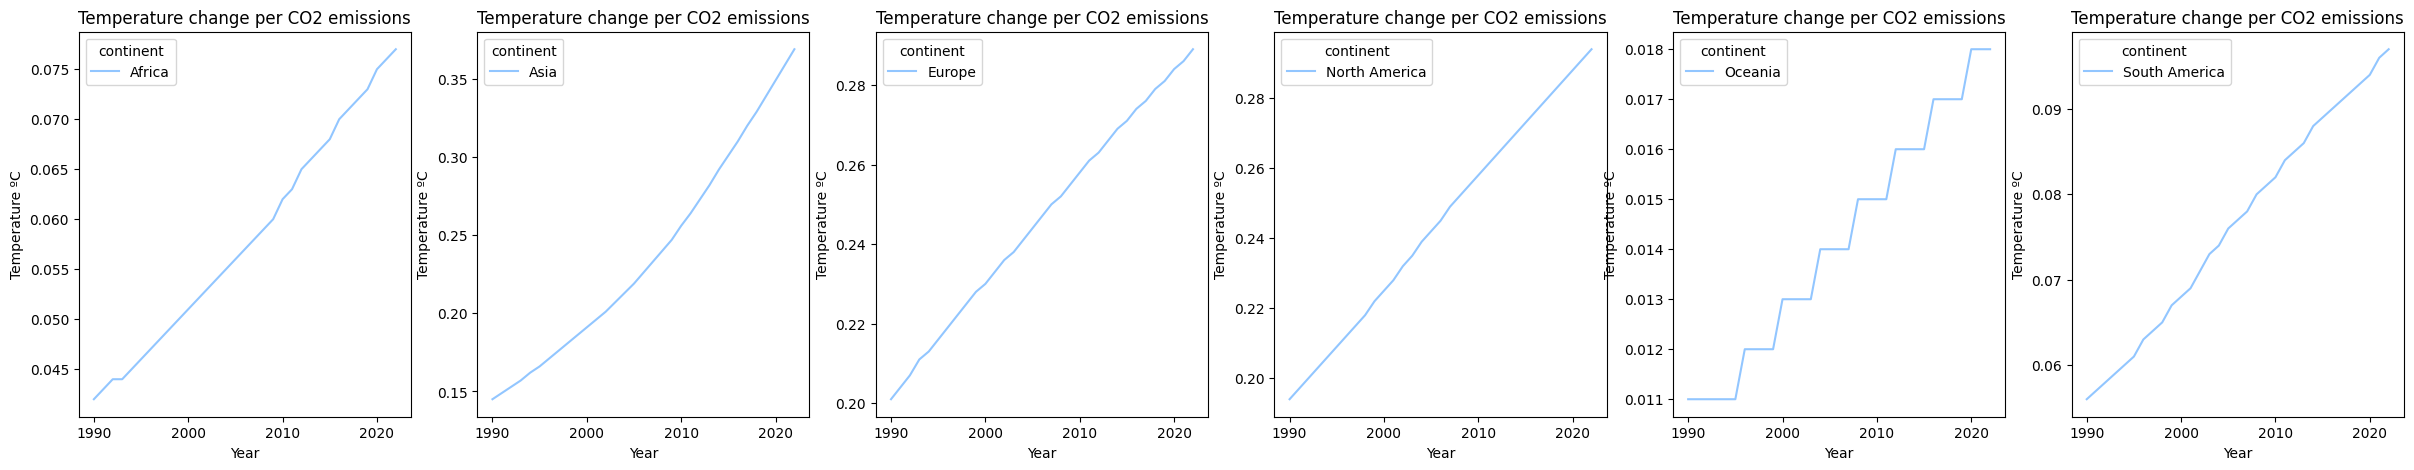

In [180]:
fig, ax = plt.subplots(1, len(data_emissions_continent["continent"].unique()), figsize=(30, 5))
for ax, cont in zip(ax, data_emissions_continent["continent"].unique()):
    subcont = data_emissions_continent[data_emissions_continent["continent"] == cont]
    plot1 = sns.lineplot(data=subcont, x='year', y='temperature_change_from_co2', ax = ax, hue='continent')
    plot1.set_ylabel('Temperature ºC')
    plot1.set_xlabel('Year')
    plot1.set_title('Temperature change per CO2 emissions')
plt.show()

In [169]:
#The continent with the major increase temperature due to CO2 emission:
print(f'The continent with the highest increase in temperature due to CO2 emission is {data_emissions_continent.loc[data_emissions_continent['temperature_change_from_co2'].idxmax(), 'continent']}')


The continent with the highest increase in temperature due to CO2 emission is Asia


In [170]:
#How much is the increase:
print(f'The increase in temperature due to CO2 emissions is {data_emissions_continent['temperature_change_from_co2'].max()} ºC')

The increase in temperature due to CO2 emissions is 0.369 ºC


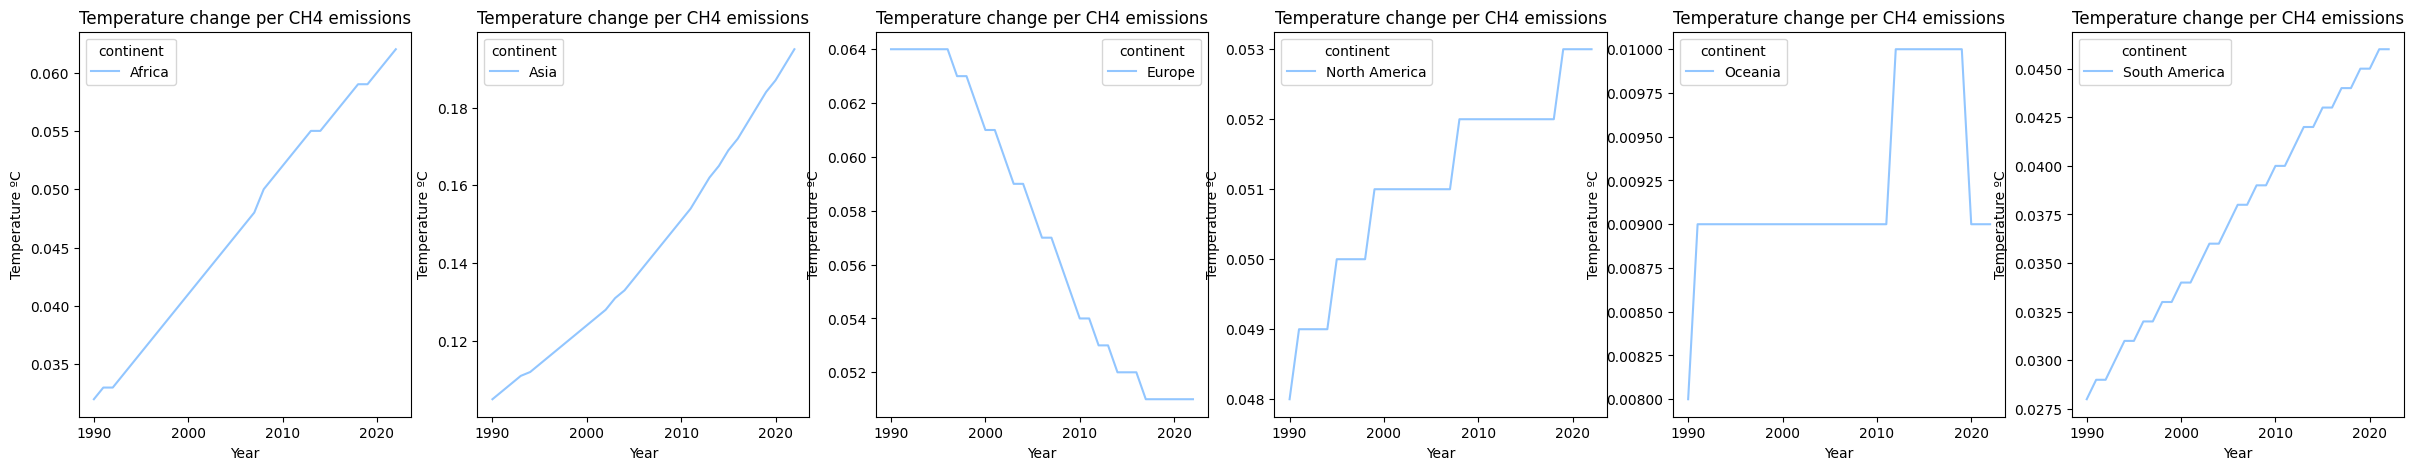

In [181]:
fig, ax = plt.subplots(1, len(data_emissions_continent["continent"].unique()), figsize=(30, 5))
for ax, cont in zip(ax, data_emissions_continent["continent"].unique()):
    subcont = data_emissions_continent[data_emissions_continent["continent"] == cont]
    plot1 = sns.lineplot(data=subcont, x='year', y='temperature_change_from_ch4', ax = ax, hue='continent')
    plot1.set_ylabel('Temperature ºC')
    plot1.set_xlabel('Year')
    plot1.set_title('Temperature change per CH4 emissions')
plt.show()

In [172]:
#The contient with the major increase temperature due to CH4 emission:
print(f'The continent with the highest increase in temperature due to CH4 emission is {data_emissions_continent.loc[data_emissions_continent['temperature_change_from_ch4'].idxmax(), 'continent']}')


The continent with the highest increase in temperature due to CH4 emission is Asia


In [173]:
#How much is the increase:
print(f'The increase in temperature due to CH4 emissions is {data_emissions_continent['temperature_change_from_ch4'].max()} ºC')

The increase in temperature due to CH4 emissions is 0.195 ºC


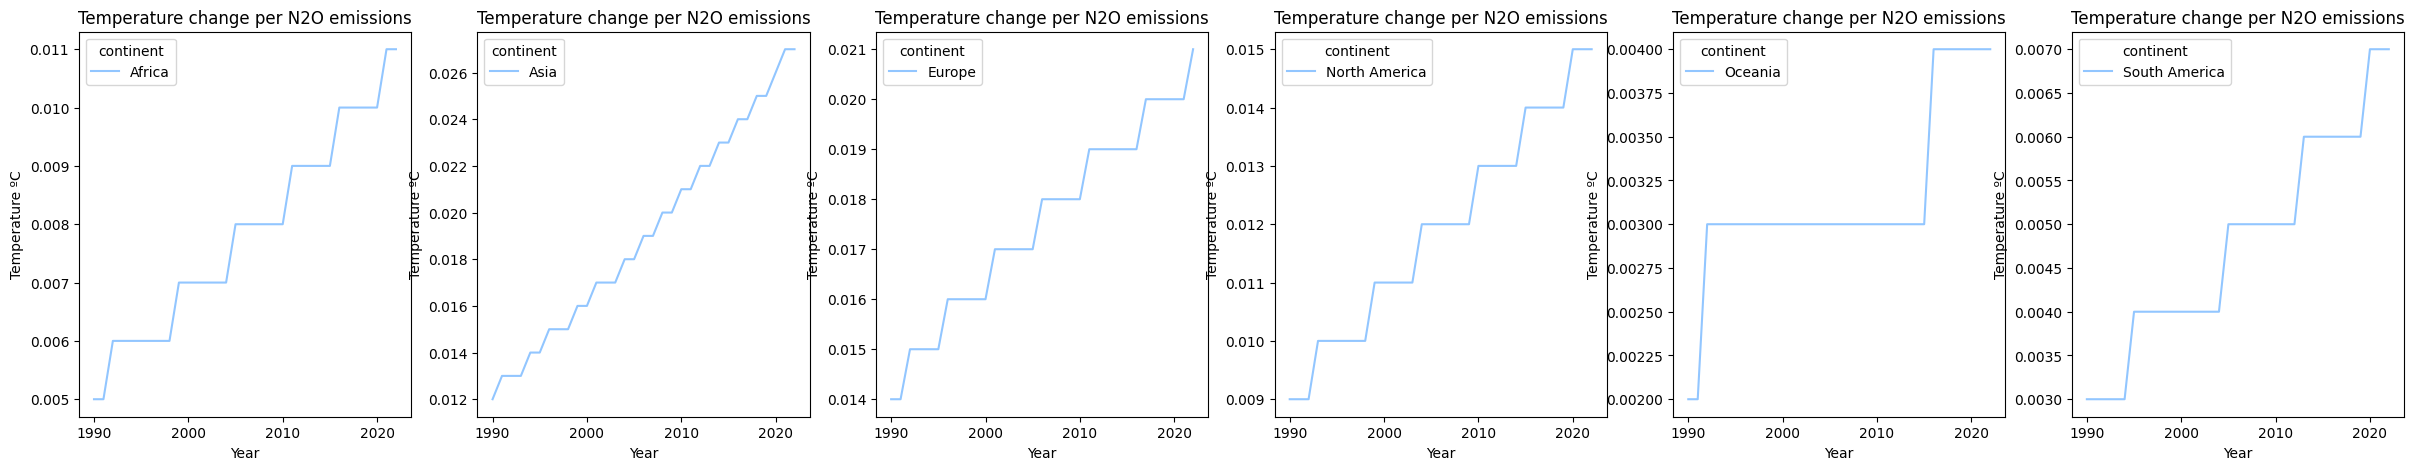

In [182]:
fig, ax = plt.subplots(1, len(data_emissions_continent["continent"].unique()), figsize=(30, 5))
for ax, cont in zip(ax, data_emissions_continent["continent"].unique()):
    subcont = data_emissions_continent[data_emissions_continent["continent"] == cont]
    plot1 = sns.lineplot(data=subcont, x='year', y='temperature_change_from_n2o', ax = ax, hue='continent')
    plot1.set_ylabel('Temperature ºC')
    plot1.set_xlabel('Year')
    plot1.set_title('Temperature change per N2O emissions')
plt.show()

In [175]:
#The contient with the major increase temperature due to CH4 emission:
print(f'The continent with the highest increase in temperature due to CH4 emission is {data_emissions_continent.loc[data_emissions_continent['temperature_change_from_n2o'].idxmax(), 'continent']}')


The continent with the highest increase in temperature due to CH4 emission is Asia


In [176]:
#How much is the increase:
print(f'The increase in temperature due to CH4 emissions is {data_emissions_continent['temperature_change_from_n2o'].max()} ºC')

The increase in temperature due to CH4 emissions is 0.027 ºC


In light of the result, global increase in temperature was plotted:

In [177]:
#New column with the sum of gas emissions:
data_emissions_continent["Global_Increase_Temperature"] = data_emissions_continent['temperature_change_from_co2'] + data_emissions_continent['temperature_change_from_ch4'] + data_emissions_continent['temperature_change_from_n2o']

C:\Users\Isa\AppData\Local\Temp\ipykernel_18036\4044661086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_emissions_continent["Global_Increase_Temperature"] = data_emissions_continent['temperature_change_from_co2'] + data_emissions_continent['temperature_change_from_ch4'] + data_emissions_continent['temperature_change_from_n2o']


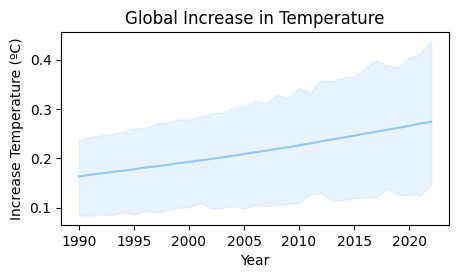

In [178]:
#Plot of global increases in temperature over the years:
plt.figure(figsize = (5,2.5))
plot_global_temperature = sns.lineplot(data=data_emissions_continent, x='year', y='Global_Increase_Temperature')
plot_global_temperature.set_xlabel('Year')
plot_global_temperature.set_ylabel('Increase Temperature (ºC)')
plot_global_temperature.set_title('Global Increase in Temperature');

In [179]:
#What is the increase in temperature:
print(f'The global temperature increase at the moment compared to the initial data registration is {round(data_emissions_continent['Global_Increase_Temperature'].max() - data_emissions_continent['Global_Increase_Temperature'].min(),2)} ºC ')


The global temperature increase at the moment compared to the initial data registration is 0.57 ºC 


# Summary #1

* In the 90s the maximal gas emissions considering the area of the continents was emitted by Europe. At this momment, Asia is emitting the highest gas emissions. For the latter result, the area of the continent have been not taken into account.


* The global temperature increase, taking into account all the continents, but not the normalized data by the area of the continent, was 0.57 ºC.


# Trends in gas emissions in Spain

With regard to gas emissions in Spain, the data was analysed to identify trends in both gas emissions and temperature over time.

In [11]:
df_Spain = df_global_emission[df_global_emission['country'] == 'Spain'] #Data from Spain
df_Spain = df_Spain.loc[:, df_Spain.columns.isin(['country', 'year', 'population', 'co2_including_luc',
                                                           'co2_including_luc_per_capita','consumption_co2','consumption_co2_per_capita', 'methane','methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita',
                                                           'temperature_change_from_ch4', 'temperature_change_from_co2', 'temperature_change_from_n2o' ])]
df_Spain = df_Spain.dropna() #Remove NAs
df_Spain

,country,year,population,co2_including_luc,co2_including_luc_per_capita,consumption_co2,consumption_co2_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_n2o
43190,Spain,1990,39084975.0,216.539,5.540,264.639,6.771,42.495,1.087,22.011,0.563,0.001,0.003,0.000
43191,Spain,1991,39201749.0,223.547,5.702,270.339,6.896,42.642,1.088,21.472,0.548,0.001,0.003,0.000
43192,Spain,1992,39420344.0,224.984,5.707,292.142,7.411,42.919,1.089,20.007,0.508,0.002,0.004,0.000
43193,Spain,1993,39651627.0,215.482,5.434,271.737,6.853,42.226,1.065,20.356,0.513,0.002,0.004,0.000
43194,Spain,1994,39858722.0,206.679,5.185,275.376,6.909,42.734,1.072,20.917,0.525,0.002,0.004,0.000
43195,Spain,1995,40052733.0,261.529,6.530,287.549,7.179,43.129,1.077,20.757,0.518,0.002,0.004,0.000
43196,Spain,1996,40237375.0,237.605,5.905,272.250,6.766,44.049,1.095,22.777,0.566,0.002,0.004,0.000
43197,Spain,1997,40423823.0,230.479,5.702,277.673,6.869,46.074,1.140,22.515,0.557,0.002,0.004,0.000
43198,Spain,1998,40617436.0,248.503,6.118,291.685,7.181,46.598,1.147,23.588,0.581,0.002,0.004,0.001
43199,Spain,1999,40812855.0,274.864,6.735,315.691,7.735,47.054,1.153,23.709,0.581,0.002,0.004,0.001


In [ ]:
#Identify the year with maximal and minimal gas emissions
print(f'The year with the minimal CO2 gas emissions {df_Spain.loc[df_Spain['co2_including_luc'].idxmin(), 'year']}')
print(f'The year with the maximal CO2 gas emissions {df_Spain.loc[df_Spain['co2_including_luc'].idxmax(), 'year']}')



The year with the minimal CO2 gas emissions 2020
The year with the maximal CO2 gas emissions 2005


In [ ]:
#Identify the year with maximal and minimal gas emissions
print(f'The year with the minimal CH4 gas emissions {df_Spain.loc[df_Spain['methane'].idxmin(), 'year']}')
print(f'The year with the maximal CH4 gas emissions {df_Spain.loc[df_Spain['methane'].idxmax(), 'year']}')


The year with the minimal CH4 gas emissions 1993
The year with the maximal CH4 gas emissions 2009


In [ ]:
#Identify the year with maximal and minimal gas emissions
print(f'The year with the minimal N2O gas emissions {df_Spain.loc[df_Spain['nitrous_oxide'].idxmin(), 'year']}')
print(f'The year with the maximal N20 gas emissions {df_Spain.loc[df_Spain['nitrous_oxide'].idxmax(), 'year']}')


The year with the minimal N2O gas emissions 2012
The year with the maximal N20 gas emissions 2003


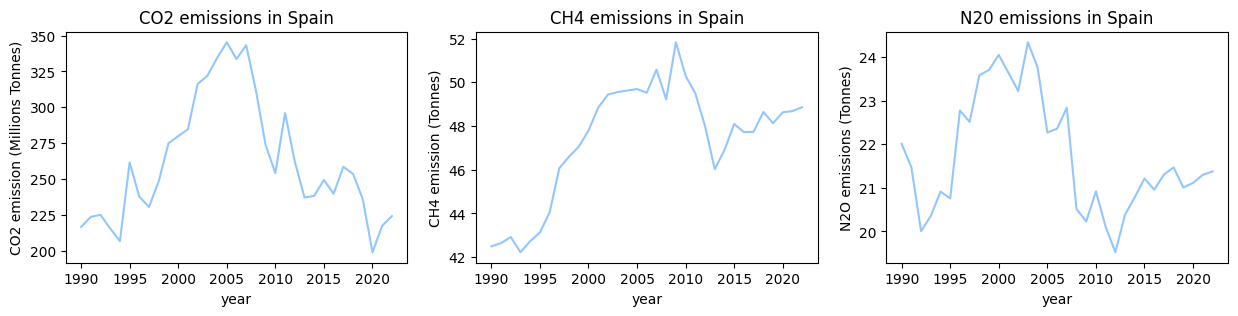

In [ ]:
#Plotting gas emissions over years
fig, [ax_CO2, ax_CH4, ax_N2O] = plt.subplots(1, 3, figsize=(15, 3))
plot_CO2 = sns.lineplot(data=df_Spain, x='year', y='co2_including_luc', ax=ax_CO2)
plot_CO2.set_xlabel('year')
plot_CO2.set_ylabel('CO2 emission (Millions Tonnes)')
plot_CO2.set_title('CO2 emissions in Spain')

plot_CH4 = sns.lineplot(data=df_Spain, x='year', y='methane', ax=ax_CH4)
plot_CH4.set_xlabel('year')
plot_CH4.set_ylabel('CH4 emission (Tonnes)')
plot_CH4.set_title('CH4 emissions in Spain')

plot_N20 = sns.lineplot(data=df_Spain, x='year', y='nitrous_oxide', ax=ax_N2O)
plot_N20.set_ylabel('N2O emissions (Tonnes)')
plot_N20.set_xlabel('year')
plot_N20.set_title('N20 emissions in Spain');

After having obtained the previous results of the gas emissions in Spain, countries with maximal and minimal CO<sub>2</sub> emissions were identified.

1. Only CO<sub>2</sub> gas emissions was considerated 
2. Nas have been removed

In [245]:
df_tocompare = df_global_emission.loc[:, df_global_emission.columns.isin(['country', 'year', 'population', 'co2_including_luc'])]
df_tocompare = df_tocompare.dropna() # To remove Nas

In [246]:
#Group by country to obtain a mean of CO2 emission
df_tocompare_country = df_tocompare.groupby('country')[['co2_including_luc']].mean()
display(df_tocompare_country)

,co2_including_luc
country,
Afghanistan,8.007960
Africa,1219.966671
Albania,5.963429
Algeria,57.287519
Andorra,0.490559
...,...
Vietnam,105.812303
World,24414.344226
Yemen,9.867257


In [267]:
# To choose the top three countries with maximal and minimal gas emissions
top3 = df_tocompare_country.sort_values(by='co2_including_luc', ascending= False).iloc[:3]
min3 = df_tocompare_country.sort_values(by='co2_including_luc', ascending= False).iloc[-3:]

In [268]:
pd.concat([min3, top3], join='outer', axis=0) #Dataframe with the minimal (index [0:3]) and maximal (index [-3:]) CO2 emissions per country

,co2_including_luc
country,
Tuvalu,0.009265
Niue,0.005685
Sao Tome and Principe,-0.029644
World,24414.344226
High-income countries,8309.898126
Upper-middle-income countries,5390.761912


Moving back to Spain ...

Temperature increase over year were plotted.

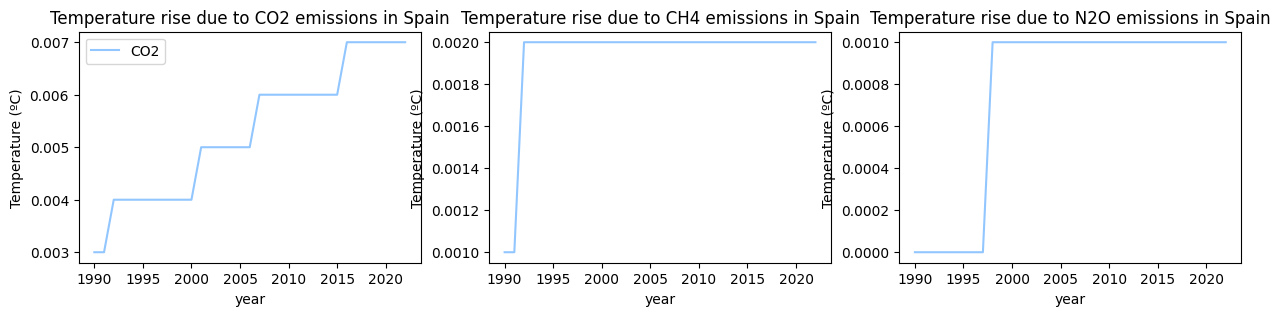

In [ ]:
#Plotting temperature increases since gas emissions over years
fig, [ax_CO2, ax_CH4, ax_N2O] = plt.subplots(1, 3, figsize=(15, 3))
plot_CO2 = sns.lineplot(data=df_Spain, x='year', y='temperature_change_from_co2', ax=ax_CO2, label ='CO2')
plot_CO2.set_xlabel('year')
plot_CO2.set_ylabel('Temperature (ºC)')
plot_CO2.set_title('Temperature rise due to CO2 emissions in Spain')

plot_CH4 = sns.lineplot(data=df_Spain, x='year', y='temperature_change_from_ch4', ax=ax_CH4)
plot_CH4.set_xlabel('year')
plot_CH4.set_ylabel('Temperature (ºC)')
plot_CH4.set_title('Temperature rise due to CH4 emissions in Spain')

plot_N20 = sns.lineplot(data=df_Spain, x='year', y='temperature_change_from_n2o', ax=ax_N2O)
plot_N20.set_ylabel('Temperature (ºC)')
plot_N20.set_xlabel('year')
plot_N20.set_title('Temperature rise due to N2O emissions in Spain');

In [ ]:
#Temperature increases due to CO2 emissions
print(f'The increase in temperature due to CO2 emissions in Spain from 1990 to 2022 is {df_Spain['temperature_change_from_co2'].max() - df_Spain['temperature_change_from_co2'].min()} ºC')

The increase in temperature due to CO2 emissions in Spain from 1990 to 2022 is 0.004 ºC


# Summary #2
+ These results have not clarify a trend in a decline in gas emissions in Spain over the past few years.
+ However, the temperature remains consistent in the case of CH4 and N20 gas emissions. For CO2, a period of increases has been followed by a period of stability in the temperature rise.

<h1 style="text-align: center;"><strong>Capital investment in environmental protection in Spain</strong></h1>

### General information:
After identifying the trends in gas emissions in Spain, the objective is to determine the level of investment in environmental protection, specially in avoiding gas emissions.

The data was downloaded from [INE](https://ine.es/dyngs/INEbase/operacion.htm?c=Estadistica_C&cid=1254736176846&menu=resultados&idp=1254735976612)

# Explore the dataframe

In [159]:
df_environment = pd.read_csv(path + "/Inversion_proteccion_ambiental.csv", sep=";")
df_environment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Sector de actividad económica     12960 non-null  object
 1   Tipo de equipo e instalación      12960 non-null  object
 2   Ámbito medioambiental             12960 non-null  object
 3   Total Nacional                    12960 non-null  object
 4   Comunidades y Ciudades Autónomas  12240 non-null  object
 5   Periodo                           12960 non-null  int64 
 6   Total                             12960 non-null  object
dtypes: int64(1), object(6)
memory usage: 708.9+ KB


<u>Problem identified</u>:

+ The 'Total' column is of  the type *object*, and as such should be numeric.
+ To solve it, point was replaced and the 'Total' column was converted to a numerical value using a pd function: **pd.to_numeric**

In [160]:
df_environment['Total'] = df_environment['Total'].str.replace('.', '')
df_environment['Total'] = pd.to_numeric(df_environment['Total'])
df_environment


,Sector de actividad económica,Tipo de equipo e instalación,Ámbito medioambiental,Total Nacional,Comunidades y Ciudades Autónomas,Periodo,Total
0,C. Industria manufacturera,INVERSIÓN EN EQUIPOS E INSTALACIONES INDEPENDI...,Total,Total Nacional,NaN,2022,144206873.0
1,C. Industria manufacturera,INVERSIÓN EN EQUIPOS E INSTALACIONES INDEPENDI...,Total,Total Nacional,NaN,2021,144386935.0
2,C. Industria manufacturera,INVERSIÓN EN EQUIPOS E INSTALACIONES INDEPENDI...,Total,Total Nacional,NaN,2020,109727889.0
3,C. Industria manufacturera,INVERSIÓN EN EQUIPOS E INSTALACIONES INDEPENDI...,Total,Total Nacional,NaN,2019,148271170.0
4,C. Industria manufacturera,INVERSIÓN EN EQUIPOS E INSTALACIONES INDEPENDI...,Total,Total Nacional,NaN,2018,116326264.0
...,...,...,...,...,...,...,...
12955,Total actividades,INVERSIÓN TOTAL,Otras actividades de protección ambiental,Total Nacional,"17 Rioja, La",2012,412028.0
12956,Total actividades,INVERSIÓN TOTAL,Otras actividades de protección ambiental,Total Nacional,"17 Rioja, La",2011,95451.0
12957,Total actividades,INVERSIÓN TOTAL,Otras actividades de protección ambiental,Total Nacional,"17 Rioja, La",2010,204523.0
12958,Total actividades,INVERSIÓN TOTAL,Otras actividades de protección ambiental,Total Nacional,"17 Rioja, La",2009,683180.0


In [161]:
display(df_environment['Comunidades y Ciudades Autónomas'].unique(),df_environment['Sector de actividad económica'].unique())

array([nan, '01 Andalucía', '02 Aragón', '03 Asturias, Principado de',
       '04 Balears, Illes', '05 Canarias', '06 Cantabria',
       '07 Castilla y León', '08 Castilla - La Mancha', '09 Cataluña',
       '10 Comunitat Valenciana', '11 Extremadura', '12 Galicia',
       '13 Madrid, Comunidad de', '14 Murcia, Región de',
       '15 Navarra, Comunidad Foral de', '16 País Vasco', '17 Rioja, La'],
      dtype=object)

array(['C. Industria manufacturera', 'Total actividades'], dtype=object)

In [162]:
display(df_environment['Tipo de equipo e instalación'].unique(), df_environment['Ámbito medioambiental'].unique())

array(['INVERSIÓN EN EQUIPOS E INSTALACIONES INDEPENDIENTES',
       'INVERSIÓN EN EQUIPOS E INSTALACIONES INTEGRADOS',
       'INVERSIÓN TOTAL'], dtype=object)

array(['Total', 'Protección del aire y el clima',
       'Gestión de aguas residuales', 'Gestión de residuos',
       'Protección y descontaminación de suelos, aguas subterráneas y superficiales',
       'Reducción del ruido y las vibraciones',
       'Protección de la biodiversidad y los paisajes',
       'Otras actividades de protección ambiental'], dtype=object)

In [ ]:
df_environment.isnull()
df_environment["Comunidades y Ciudades Autónomas"] = df_environment['Comunidades y Ciudades Autónomas'].fillna('00 Total nacional') #remove Nas
#Nas are filled

### Plot the capital investment in enviromental protection

In [184]:
#Dataframe with the mean investment in environmental proctetion in each region
df_environment_comunidades = df_environment.groupby('Comunidades y Ciudades Autónomas')[['Total']].mean().sort_values( by = 'Total', ascending= True)
df_environment_comunidades

,Total
Comunidades y Ciudades Autónomas,
"04 Balears, Illes",4.845213e+05
"17 Rioja, La",6.179470e+05
05 Canarias,1.347431e+06
11 Extremadura,1.480324e+06
06 Cantabria,2.372130e+06
"15 Navarra, Comunidad Foral de",3.252419e+06
"14 Murcia, Región de",4.157101e+06
02 Aragón,4.560008e+06
"13 Madrid, Comunidad de",5.488465e+06


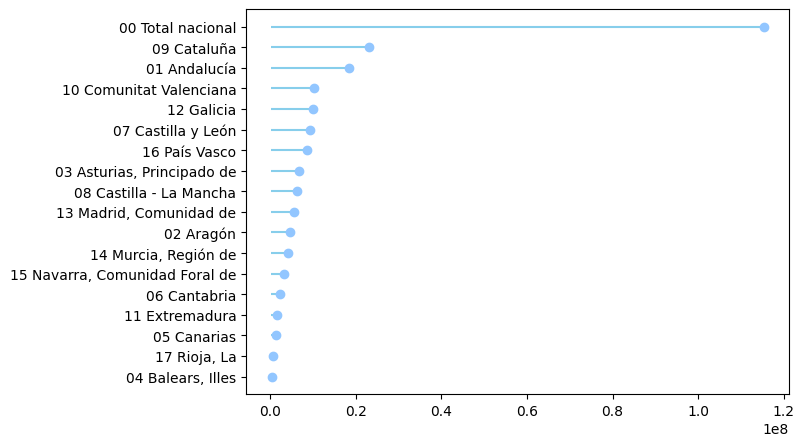

In [195]:
plt.figure(figsize=(7,5))
plt.hlines(y=df_environment_comunidades.index,
           xmin=100000,
           xmax=df_environment_comunidades,
           color='skyblue')
plt.plot(df_environment_comunidades, df_environment_comunidades.index, "o");

# Summary #3:
The mean capital investment in environmental protection in Spain is 10<sup>8</sup> euros. The top 3 region with the maximal capital investment are Cataluña, Andalucía and Comunidad Valenciana. 

Unfortunately, the dataset used did not include data on investments to avoid gas emissions ... 

For this reason, the general result is that environmental investments in Spain will be useful for other areas of the environment, but not to clarify the reduction of gas emissions.


[DocuSerie de soluciones climáticas](https://hopelaserie.com/docuserie/)